In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Important Features Selection

In [38]:
fs = pd.read_csv('mobile_dataset.csv')
fs

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


# EDA operation

  0%|                                                                                                         …

DataPrep Report
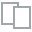
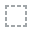
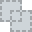
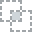
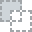
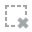
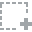
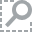
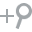
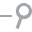
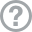
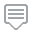
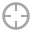
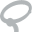
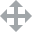
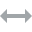
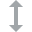
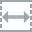
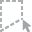
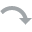
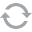
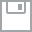
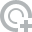
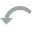
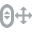
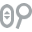
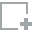
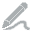
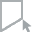
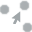
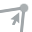
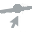

In [65]:
from dataprep.eda import create_report
create_report(fs)

In [3]:
fs.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [4]:
fs.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
sns.heatmap(fs.isnull(),annot = True)

<AxesSubplot:>

Univariate Selection

In [7]:
x = fs.iloc[:,:-1]
y = fs['price_range']

In [8]:
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [9]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

Features selections Techniques

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [13]:
#apply selectKBest algorithms
ordered_rank_features = SelectKBest(score_func = chi2,k=20)
ordered_features = ordered_rank_features.fit(x,y)

In [14]:
ordered_features

SelectKBest(k=20, score_func=<function chi2 at 0x000001ECDA5E38B0>)

In [17]:
fs_score  = pd.DataFrame(ordered_features.scores_ , columns = ['Score'])
fs_columns = pd.DataFrame(x.columns)
fs_columns

,0
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc
5,four_g
6,int_memory
7,m_dep
8,mobile_wt
9,n_cores


In [18]:
features_rank = pd.concat([fs_columns,fs_score],axis = 1)
features_rank

,0,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [19]:
features_rank.columns = ['Features','Score']
features_rank

,Features,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [20]:
features_rank.nlargest(15,'Score')

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


### Feature Importance
This technique gives you a score for each feature of your data,the higher the score mor relevant it is

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [25]:
print(model.feature_importances_)


[0.06067078 0.02022479 0.03370116 0.01933423 0.03134247 0.01734666
 0.03588452 0.03435521 0.0350123  0.03389988 0.03287021 0.04686214
 0.04880701 0.39438047 0.03498751 0.03328534 0.03484747 0.01444189
 0.0183027  0.01944326]


<AxesSubplot:>

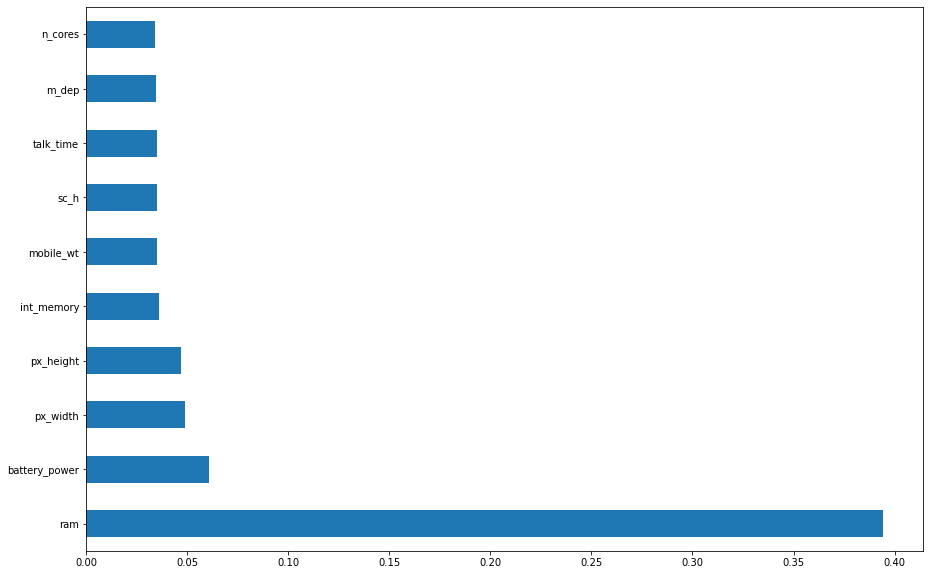

In [28]:
plt.figure(figsize = (15,10))
ranked_features = pd.Series(model.feature_importances_ , index = x.columns)
ranked_features.nlargest(10).plot(kind = 'barh')

## Handling Correlation Features between columns

<AxesSubplot:>

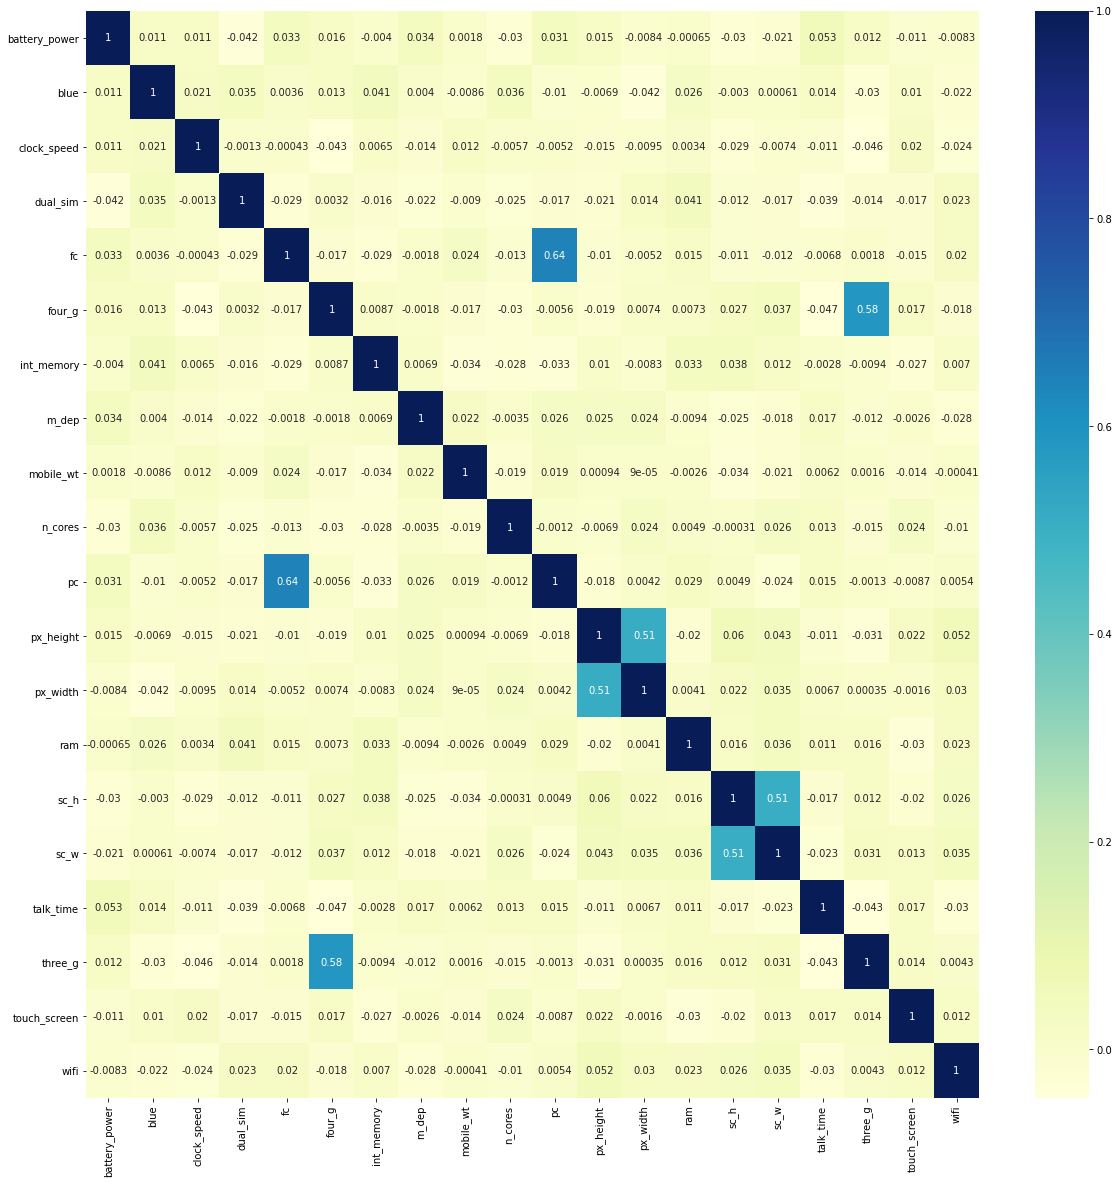

In [66]:
import seaborn as sns
corr=fs.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(fs[top_features].corr(),annot=True,cmap="YlGnBu")

Removing the correlation

In [58]:
threshold =0.8
def correlation(datasets,threshold):
    col_corr = set()  #set of all the names of correlation columns
    corr_matrix = datasets.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) >threshold:       # we are interested in absolute coeff value
                col_name = corr_matrix.columns[i]   # getting the name of column
                col_corr.add(columns)
        return col_corr
    
correlation(fs.iloc[:,:-1],threshold)

set()

information Gain

In [61]:
from sklearn.feature_selection import mutual_info_classif

In [62]:
mutual_info = mutual_info_classif(x,y)

In [63]:
mutual_data = pd.Series(mutual_info, index = x.columns)
mutual_data.sort_values(ascending =False)

ram              0.848824
fc               0.037787
dual_sim         0.033385
px_height        0.030343
px_width         0.025951
battery_power    0.024848
mobile_wt        0.021171
sc_h             0.019017
n_cores          0.016330
int_memory       0.008224
clock_speed      0.003043
pc               0.000331
blue             0.000000
m_dep            0.000000
four_g           0.000000
sc_w             0.000000
talk_time        0.000000
three_g          0.000000
touch_screen     0.000000
wifi             0.000000
dtype: float64